# Sentiment Analysis Movie Review

For this analysis we’ll be using a dataset of 50,000 movie reviews taken from IMDb. The data was compiled by Andrew Maas and can be found here: IMDb Reviews.
The data is split evenly with 25k reviews intended for training and 25k for testing your classifier. Moreover, each set has 12.5k positive and 12.5k negative reviews.
IMDb lets users rate movies on a scale from 1 to 10. To label these reviews the curator of the data labeled anything with ≤ 4 stars as negative and anything with ≥ 7 stars as positive. Reviews with 5 or 6 stars were left out.

The dataset is available at http://ai.stanford.edu/~amaas/data/sentiment/.

In [1]:
import warnings
warnings.filterwarnings("ignore")

In [2]:
# load_files module loads text files with categories as subfolder names.
# The folder names are used as supervised signal label names. 
# The individual file names are not important.
from sklearn.datasets import load_files
import numpy as np
from sklearn.feature_extraction.text import CountVectorizer
import os
import random
np.set_printoptions(precision=3, suppress=True)
import pandas as pd
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import scale, StandardScaler

import matplotlib.pyplot as plt
%matplotlib inline
#plt.rcParams["figure.dpi"] = 300
plt.rcParams["savefig.dpi"] = 300
plt.rcParams["savefig.bbox"] = "tight"

You may not always find the dataset available for you to download from Sklearn, Keras type of platforms. Most of the times, you will have to find the dataset yourself and read it to your work space from some file. Below, you will find how you can read the IMDB text files from a folder where files are arranged by the label names.

In [3]:
def load_imdb_sentiment_analysis_dataset(data_path, seed=123):
    """Loads the IMDb movie reviews sentiment analysis dataset.

    # Arguments
        data_path: string, path to the data directory.
        seed: int, seed for randomizer.

    # Returns
        A tuple of training and validation data.
        Number of training samples: 25000
        Number of test samples: 25000
        Number of categories: 2 (0 - negative, 1 - positive)

    # References
        Mass et al., http://www.aclweb.org/anthology/P11-1015

        Download and uncompress archive from:
        http://ai.stanford.edu/~amaas/data/sentiment/aclImdb_v1.tar.gz
    """
    imdb_data_path = os.path.join(data_path, 'aclImdb')

    # Load the training data
    train_texts = []
    train_labels = []
    for category in ['pos', 'neg']:
        train_path = os.path.join(imdb_data_path, 'train', category)
        for fname in sorted(os.listdir(train_path)):
            if fname.endswith('.txt'):
                with open(os.path.join(train_path, fname)) as f:
                    z=f.read()
                    train_texts.append(str(z))
                train_labels.append(0 if category == 'neg' else 1)

    # Load the validation data.
    test_texts = []
    test_labels = []
    for category in ['pos', 'neg']:
        test_path = os.path.join(imdb_data_path, 'test', category)
        for fname in sorted(os.listdir(test_path)):
            if fname.endswith('.txt'):
                with open(os.path.join(test_path, fname)) as f:
                    z=f.read()
                    test_texts.append(str(z))
                test_labels.append(0 if category == 'neg' else 1)

    # Shuffle the training data and labels.
    random.seed(seed)
    random.shuffle(train_texts)
    random.seed(seed)
    random.shuffle(train_labels)

    return (train_texts, np.array(train_labels),
            test_texts, np.array(test_labels))

# Load the train dataset

- Load the dataset and divide data into trainval and test datasets. 
- Print the type of the trainval dataset
- Print the length of the trainval dataset
- Print the first document in your trainval dataset


In [4]:
#reviews_train = load_files("aclImdb/train")
#text_train, y_train = reviews_train.data, reviews_train.target
text_trainval, y_trainval, text_test, y_test = \
load_imdb_sentiment_analysis_dataset("", seed=123)
print("type of text train: {}".format(type(text_trainval)))
print("length of text_train: {}".format(len(text_trainval)))
print("text_train[1]:\n{}".format(text_trainval[1]))

type of text train: <class 'list'>
length of text_train: 25000
text_train[1]:
The long list of "big" names in this flick (including the ubiquitous John Mills) didn't bowl me over to the extent that I couldn't judge the film on its actual merits. It is FULL of stereotypes, caricatures, and standard, set scenes, from the humble air-ace hero to the loud-mouthed yank flyer. The music track was such that at one point, about an hour before the end, I thought the film was over: loud, rising crescendo, grand flourish and finish then silence, but then the movie continued! I found no real storyline, haphazard writing, but smartly-pressed uniforms and the pretty Jean Simmons (pre-nose job) with a rousing little ditty. I cannot say that this picture has any of the ingredients which make a film great. I found it maudlin, mawkish and minor.


- Print the type of your labels 'y'
- Print the lnegth of your labels
- Print the first three labels

In [5]:
print("type of y train: {}\n".format(type(y_trainval)))
print("length of y train: {}\n".format(len(y_trainval)))
print("y_train[0]:{}".format(y_trainval[0]))
print("y_train[1]:{}".format(y_trainval[1]))
print("y_train[2]:{}".format(y_trainval[2]))

type of y train: <class 'numpy.ndarray'>

length of y train: 25000

y_train[0]:0
y_train[1]:0
y_train[2]:1


In [6]:
a=(text_trainval[1])
print(a)
a[0]
a.replace("<br />", " ")

The long list of "big" names in this flick (including the ubiquitous John Mills) didn't bowl me over to the extent that I couldn't judge the film on its actual merits. It is FULL of stereotypes, caricatures, and standard, set scenes, from the humble air-ace hero to the loud-mouthed yank flyer. The music track was such that at one point, about an hour before the end, I thought the film was over: loud, rising crescendo, grand flourish and finish then silence, but then the movie continued! I found no real storyline, haphazard writing, but smartly-pressed uniforms and the pretty Jean Simmons (pre-nose job) with a rousing little ditty. I cannot say that this picture has any of the ingredients which make a film great. I found it maudlin, mawkish and minor.


'The long list of "big" names in this flick (including the ubiquitous John Mills) didn\'t bowl me over to the extent that I couldn\'t judge the film on its actual merits. It is FULL of stereotypes, caricatures, and standard, set scenes, from the humble air-ace hero to the loud-mouthed yank flyer. The music track was such that at one point, about an hour before the end, I thought the film was over: loud, rising crescendo, grand flourish and finish then silence, but then the movie continued! I found no real storyline, haphazard writing, but smartly-pressed uniforms and the pretty Jean Simmons (pre-nose job) with a rousing little ditty. I cannot say that this picture has any of the ingredients which make a film great. I found it maudlin, mawkish and minor.'

- If you go over the reviews in the directory structure, you will notice that many of the reviews contain some html line breaks. 
- Let's clean this. text_trainval is a list containing type bytes(bytes represents a binary encoding of the string data in Python 3.
- after cleaning your dataset, divide your trainval dataset into train and validation datasets 

In [7]:
text_trainval = [doc.replace("<br />", " ") \
                 for doc in text_trainval]
print("\nSamples per class (training): {}\n".\
      format(np.bincount(y_trainval)))


Samples per class (training): [12500 12500]



In [8]:
len(np.unique(text_trainval))

24904

In [9]:
np.unique(y_trainval)

array([0, 1])

In [10]:
len(np.unique(y_trainval))

2

In [11]:
print("text_train[1]:\n{}".format(text_trainval[1]))

text_train[1]:
The long list of "big" names in this flick (including the ubiquitous John Mills) didn't bowl me over to the extent that I couldn't judge the film on its actual merits. It is FULL of stereotypes, caricatures, and standard, set scenes, from the humble air-ace hero to the loud-mouthed yank flyer. The music track was such that at one point, about an hour before the end, I thought the film was over: loud, rising crescendo, grand flourish and finish then silence, but then the movie continued! I found no real storyline, haphazard writing, but smartly-pressed uniforms and the pretty Jean Simmons (pre-nose job) with a rousing little ditty. I cannot say that this picture has any of the ingredients which make a film great. I found it maudlin, mawkish and minor.


In [12]:
print("y_train[1]:\n{}".format(y_trainval[1]))

y_train[1]:
0


In [13]:

text_train, text_val, y_train, y_val =\
train_test_split(text_trainval,y_trainval,\
                 stratify=y_trainval, random_state=0)

### Latent Semantic Analysis (LSA)
LSA is basically just the same as PCA. The idea is to reduce the dimensionality of the data to some semantically meaningful components. The thing is, we can't easily do PCA here, because we can’t remove the mean. Remember, this is a sparse dataset and so the zero is sort of meaningful and if we shift the zero, like by trying to subtract the mean, we will get a density dataset that won't have many zeros anymore and so we won’t be able to even store it.

There are ways to still compute PCA without explicitly creating a big dense matrix, but in the traditional LSA, we just ignore that and do a singular value decomposition (SVD) of the data. This is exactly the same computation as PCA, only, we don't subtract the mean.


In [14]:
from sklearn.feature_extraction.text import CountVectorizer
vect = CountVectorizer(stop_words="english", min_df=4)
X_train = vect.fit_transform(text_train)

In [15]:
X_train.shape

(18750, 26604)

Below, we are doing a truncated SVD and extract 100 components. And so the components we extract are 100 X number of features. So we have 100 vectors, where each feature corresponds to one of the words in the vocabulary.

In [16]:
from sklearn.decomposition import TruncatedSVD
lsa = TruncatedSVD(n_components=100)
X_lsa = lsa.fit_transform(X_train)

In [17]:
lsa.components_.shape

(100, 26604)

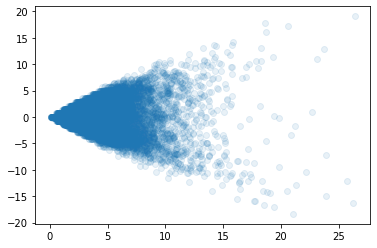

In [18]:
plt.scatter(X_lsa[:, 0], X_lsa[:, 1], alpha=.1)

Here's is a semi-log scale. And you can see that the first one or two explain a lot and then rapidly decreases. A lot is captured in the first 10, and then it goes down.

But still at 100, there's still a lot of variances left, so it'll just probably go down logarithmically as it goes on.

Text(0.5, 0, 'Component index')

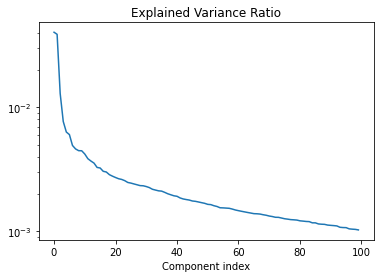

In [19]:
plt.semilogy(lsa.explained_variance_ratio_)
plt.title("Explained Variance Ratio")
plt.xlabel("Component index")
#plt.savefig("images/lsa_truncated_svd_plot.png")

In [21]:
lsa.components_.shape

(100, 26604)

In [33]:
coef2=lsa.components_[:5,:8]
print(coef2)
np.argsort(np.abs(coef2))[-3:]

[[ 0.001  0.003  0.     0.     0.     0.     0.     0.   ]
 [ 0.    -0.001  0.    -0.    -0.     0.    -0.    -0.   ]
 [ 0.001  0.004  0.     0.     0.001 -0.     0.    -0.   ]
 [ 0.001  0.002  0.    -0.     0.001  0.     0.     0.   ]
 [-0.     0.    -0.     0.    -0.     0.    -0.     0.   ]]


array([[7, 5, 3, 6, 2, 4, 0, 1],
       [2, 3, 6, 5, 7, 4, 0, 1],
       [3, 7, 0, 6, 5, 4, 1, 2]])

In [45]:
inds = np.argsort(np.abs(coef2))[2]
important_coefs = coef2[2,inds]
sort_sign = np.argsort(important_coefs)
myrange = range(len(inds))
combined_inds = inds[sort_sign]
print(np.abs(coef2)[2])
print(inds)
print(important_coefs)
print(sort_sign)
print(combined_inds)
print(coef2[2,combined_inds])

[0.001 0.004 0.    0.    0.001 0.    0.    0.   ]
[7 5 3 6 2 4 0 1]
[-0.    -0.     0.     0.     0.     0.001  0.001  0.004]
[1 0 2 3 4 5 6 7]
[5 7 3 6 2 4 0 1]
[-0.    -0.     0.     0.     0.     0.001  0.001  0.004]


In [23]:
coef=lsa.components_
np.argsort(np.abs(coef))[-5:]

array([[10712,  8966,   322, ..., 11374, 21092, 25751],
       [15713,  5314, 26552, ..., 14076, 25751, 24612],
       [14286, 16432, 14931, ..., 25751, 24612, 14448],
       [23090, 20019,  3221, ...,  9991, 23871, 17848],
       [24997,  3029, 18003, ..., 23997,  6045,  1034]])

In [21]:
def plot_important_features(coef, feature_names, top_n=20, ax=None):
    if ax is None:
        ax = plt.gca()
    inds = np.argsort(np.abs(coef))[-top_n:]
    important_coefs = coef[inds]
    sort_sign = np.argsort(important_coefs)
    myrange = range(len(inds))
    combined_inds = inds[sort_sign]

    ax.bar(myrange, coef[combined_inds])
    ax.set_xticks(myrange)
    ax.set_xticklabels(feature_names[combined_inds], rotation=60, ha="right")

Let's look at the eigenvectors with the highest singular values.
So the first one is sort of what you would usually get. They're all positive because all entries in the data matrix are positive since its bag of words. This is sort of, in a sense, just translating into the middle of the data, somewhat similar to trying to model the mean. ‘Movie’ and ‘film’ are obviously the most common words.

The second eigenvector is whether someone uses the word ‘movies’ or ‘films’. You can see that either someone uses ‘film’ and ‘films’ or ‘movie’ and ‘movies’. Basically, people don't usually use both of them in the same comment.

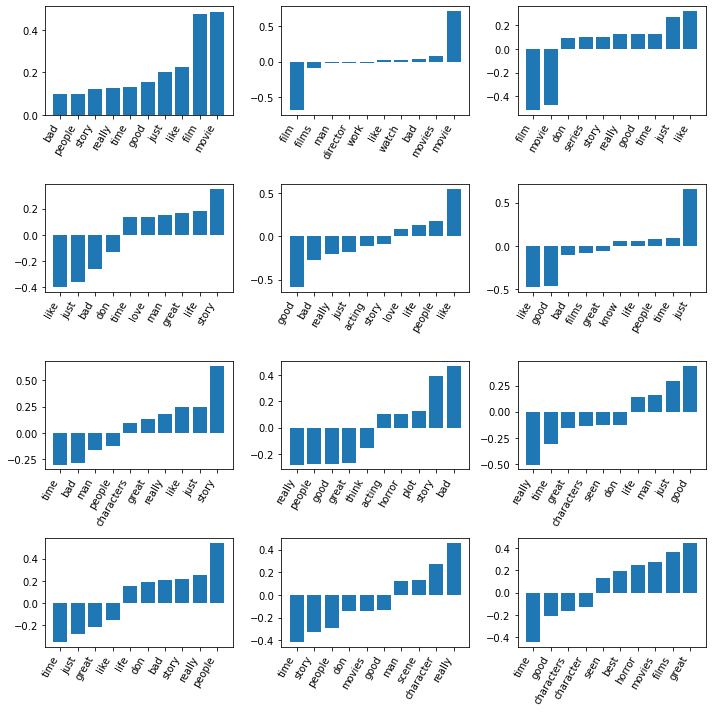

In [22]:
feature_names = np.array(vect.get_feature_names())
n_components = 10
fig, axes = plt.subplots(n_components // 3 + 1, 3, figsize=(10, 10))
for ax, coef in zip(axes.ravel(), lsa.components_):
    plot_important_features(coef, feature_names, top_n=10, ax=ax)
    
plt.tight_layout()

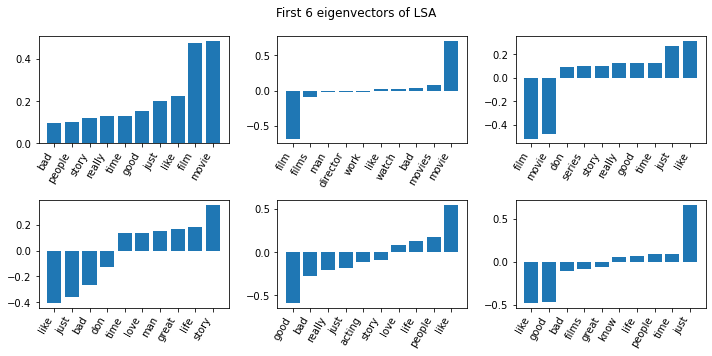

In [23]:
# Only six first
n_components = 6
fig, axes = plt.subplots(n_components // 3, 3, figsize=(10, 5))
for ax, coef in zip(axes.ravel(), lsa.components_):
    plot_important_features(coef, feature_names, top_n=10, ax=ax)
plt.suptitle("First 6 eigenvectors of LSA")
plt.tight_layout()
plt.subplots_adjust(top=.9)
#plt.savefig("images/lsa_six_eigvec.png")

# Trying normalizer
MaxAbsScaler performs the same way as a standard scaler, only it doesn't subtract the mean. So it just scales everything to have the same maximum absolute value. And so in this sense, I'm basically scaling down film and movie to have the same importance as the other words. 
``Movie`` and ``Film`` were dominating first couple of components. Try to get rid of that effect.

In [27]:
from sklearn.preprocessing import MaxAbsScaler
scaler = MaxAbsScaler()
X_scaled = scaler.fit_transform(X_train)

lsa_scaled = TruncatedSVD(n_components=100)
X_lsa_scaled = lsa_scaled.fit_transform(X_scaled)

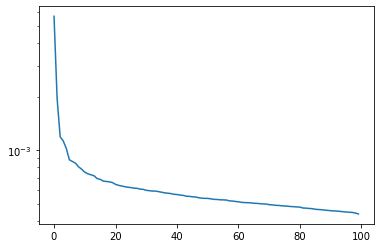

In [28]:
plt.semilogy(lsa_scaled.explained_variance_ratio_)

This is the first six eigenvectors of LSA after scaling. The first one still points towards the direction of the mean. So I found some components like the third one here, which are interesting because I interpreted this as like a writer sophistication. So there are some people that use a lot of very short words and some people use a lot of very long words. So people that use words like ‘cinematography’ also use words like ‘performance’ and ‘excellent’. This also comes out from some of the other methods.

And so I looked at a couple of these components and it turned out that the component 1 and the component 3 are actually related to the good and bad review.

Movie and film still important, but not that dominant any more.

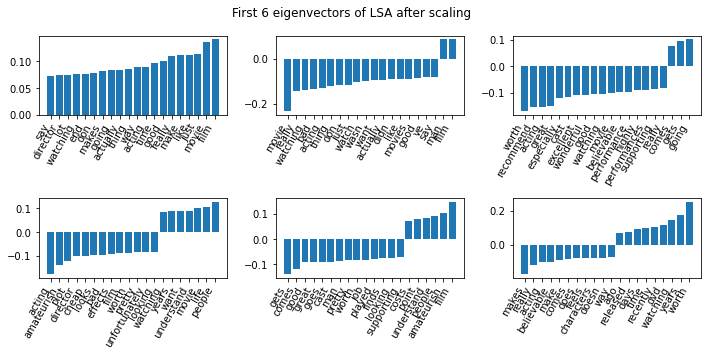

In [30]:
n_components = 6
fig, axes = plt.subplots(n_components // 3, 3, figsize=(10, 5))
for ax, coef in zip(axes.ravel(), lsa_scaled.components_):
    plot_important_features(coef, feature_names, top_n=20, ax=ax)
    
plt.suptitle("First 6 eigenvectors of LSA after scaling")
plt.tight_layout()
plt.subplots_adjust(top=.9)
#plt.savefig("images/lsa_six_eigvec_scaled.png")

Now let us use logistic regression on both regular dataset and scaled LSA transformed dataset.

In [32]:
#reviews_test = load_files("../data/aclImdb/test/")
#text_test, y_test = reviews_test.data, reviews_test.target
#text_test = [doc.replace(b"<br />", b" ") for doc in text_test]
X_test = vect.transform(text_test)

In [33]:
X_test_lsa_scaled = lsa_scaled.transform(scaler.transform(X_test))

In [34]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression(C=.1).fit(X_train, y_train)
lr.score(X_test, y_test)

0.8718

In [35]:
lr_lsa = LogisticRegression(C=100).fit(X_lsa_scaled[:, :10], y_train)
lr_lsa.score(X_test_lsa_scaled[:, :10], y_test)

0.83092

In [36]:
lr_lsa.score(X_lsa_scaled[:, :10], y_train)

0.8350933333333334

In [37]:
lsa_scaled1k = TruncatedSVD(n_components=1000)
X_lsa_scaled1k = lsa_scaled1k.fit_transform(X_scaled)

In [38]:
X_test_lsa_scaled1k = lsa_scaled1k.transform(scaler.transform(X_test))

In [39]:
lr_lsa = LogisticRegression().fit(X_lsa_scaled1k, y_train)
lr_lsa.score(X_test_lsa_scaled1k, y_test)

0.87316

In [40]:
lr_lsa.score(X_lsa_scaled1k, y_train)

0.8969066666666666

### Topic Modeling
- Each document is created as a mixture of topics
- Topics are distributions over words
- Learn topics and composition of documents simultaneously
- Unsupervised

In [41]:
from sklearn.decomposition import LatentDirichletAllocation
lda = LatentDirichletAllocation(n_components=10, learning_method="batch")
X_lda = lda.fit_transform(X_train)

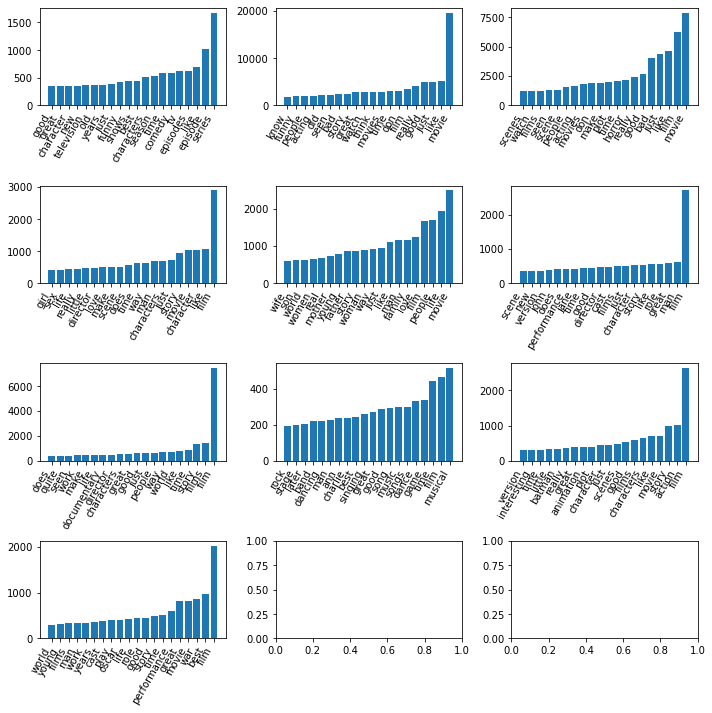

In [42]:
feature_names = np.array(vect.get_feature_names())
n_components = 10
fig, axes = plt.subplots(n_components // 3 + 1, 3, figsize=(10, 10))
for ax, coef in zip(axes.ravel(), lda.components_):
    plot_important_features(coef, feature_names, top_n=20, ax=ax)
    
plt.tight_layout()

In [43]:
lda100 = LatentDirichletAllocation(n_components=100, learning_method="batch")
X_lda100 = lda100.fit_transform(X_train)

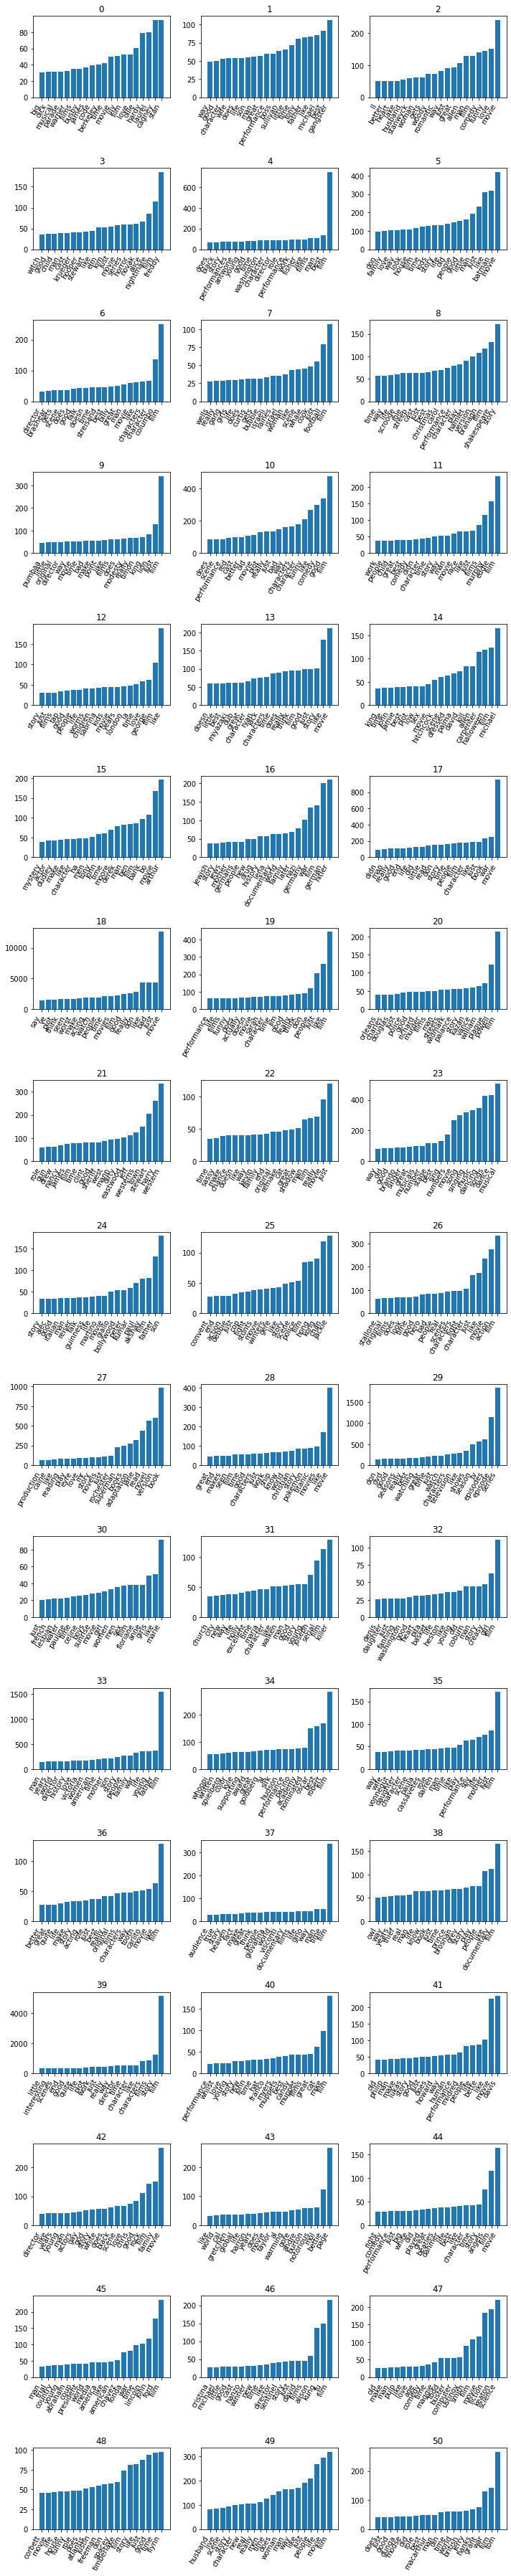

In [44]:
large_comp_inds = np.argsort(X_lda100.mean(axis=0))[-50:][::-1]

feature_names = np.array(vect.get_feature_names())
n_components = 50
fig, axes = plt.subplots(n_components // 3 + 1, 3, figsize=(10, 50))
for i, (ax, coef) in enumerate(zip(axes.ravel(), lda100.components_[:, :])):
    plot_important_features(coef, feature_names, top_n=20, ax=ax)
    ax.set_title(i)
    
plt.tight_layout()

In [45]:
def print_topics(topics, feature_names, components, topics_per_chunk=6,
                 n_words=20):
    sorting = np.argsort(components, axis=1)[:, ::-1]
    for i in range(0, len(topics), topics_per_chunk):
        # for each chunk:
        these_topics = topics[i: i + topics_per_chunk]
        # maybe we have less than topics_per_chunk left
        len_this_chunk = len(these_topics)
        # print topic headers
        print(("topic {:<8}" * len_this_chunk).format(*these_topics))
        print(("-------- {0:<5}" * len_this_chunk).format(""))
        # print top n_words frequent words
        for i in range(n_words):
            try:
                print(("{:<14}" * len_this_chunk).format(
                    *feature_names[sorting[these_topics, i]]))
            except:
                pass
        print("\n")


In [48]:
large_comp_inds = np.argsort(X_lda100.mean(axis=0))[-12:][::-1]

feature_names = np.array(vect.get_feature_names())
sorting = np.argsort(lda100.components_, axis=1)[:, ::-1]
print_topics(large_comp_inds, feature_names, sorting)

topic 18      topic 62      topic 69      topic 39      topic 57      topic 33      
--------      --------      --------      --------      --------      --------      
master        luck          encyclopedia  cooperation   crippling     milder        
suggests      suspected     shy           veronika      target        sweeter       
purity        proceedings   recognisable  emerge        caged         rapidly       
puritanical   proceeding    reclusive     hah           prosecutor    rapid         
puritan       proceeded     recluse       greenlight    prosecution   rapes         
purists       proceed       reclaim       governments   prosecuting   raped         
purist        procedures    reckoning     grams         prosecuted    rape          
puri          procedure     reckoned      hams          prose         rapaport      
purgatory     procedural    reckon        guardians     prosaic       rap           
purest        problems      recklessness  gunfights     pros     